In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
os.chdir('../')


In [2]:
df = pd.read_csv('data/processed/data.csv')
df.head()

,Estadia Hospitalaria,Estado del egreso,Edad,Sexo,Raza,Ventilacion,Sin antecedentes,Materna,HTA,DM,...,NUMERO INTERVENCIONES,Tiempo quirurgico,PH,PCO2,PO2,SB,EB,NA,K,CA
0,14.0,0.0,53.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,2.40,7.48,31.7,111.284043,23.7,1.2,135.0,2.70,0.62
1,24.0,0.0,24.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,2.15,7.36,38.3,124.000000,25.0,-1.2,138.0,3.04,0.97
2,13.0,0.0,36.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,3.00,7.16,43.7,92.000000,15.7,-9.1,132.0,2.70,0.62
3,12.0,0.0,58.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,...,1.0,2.50,7.12,50.1,82.000000,12.5,-15.6,129.0,2.20,0.96
4,24.0,0.0,43.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,...,1.0,3.45,7.25,48.7,86.600000,19.9,-6.7,132.0,3.40,0.99


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Estadia Hospitalaria            95 non-null     float64
 1   Estado del egreso               95 non-null     float64
 2   Edad                            95 non-null     float64
 3   Sexo                            95 non-null     float64
 4   Raza                            95 non-null     float64
 5   Ventilacion                     95 non-null     float64
 6   Sin antecedentes                95 non-null     float64
 7   Materna                         95 non-null     float64
 8   HTA                             95 non-null     float64
 9   DM                              95 non-null     float64
 10  CI                              95 non-null     float64
 11  AB                              95 non-null     float64
 12  EPOC                            95 non

C:\Users\User\AppData\Local\Temp\ipykernel_16912\4085542628.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Estado del egreso', data=df, palette='Set2')


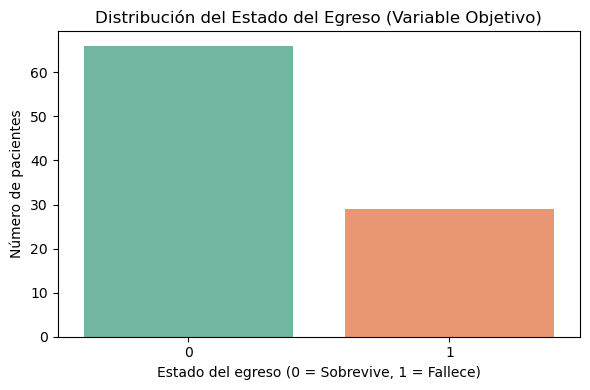

In [ ]:
df['Estado del egreso'] = df['Estado del egreso'].astype(float).astype(int)


plt.figure(figsize=(6, 4))
sns.countplot(x='Estado del egreso', data=df, palette='Set2')
plt.title("Distribución del Estado del Egreso (Variable Objetivo)")
plt.xlabel("Estado del egreso (0 = Sobrevive, 1 = Fallece)")
plt.ylabel("Número de pacientes")
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_16912\393034190.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=varianza_normalized_df, x='Varianza', y='Feature', palette='coolwarm')


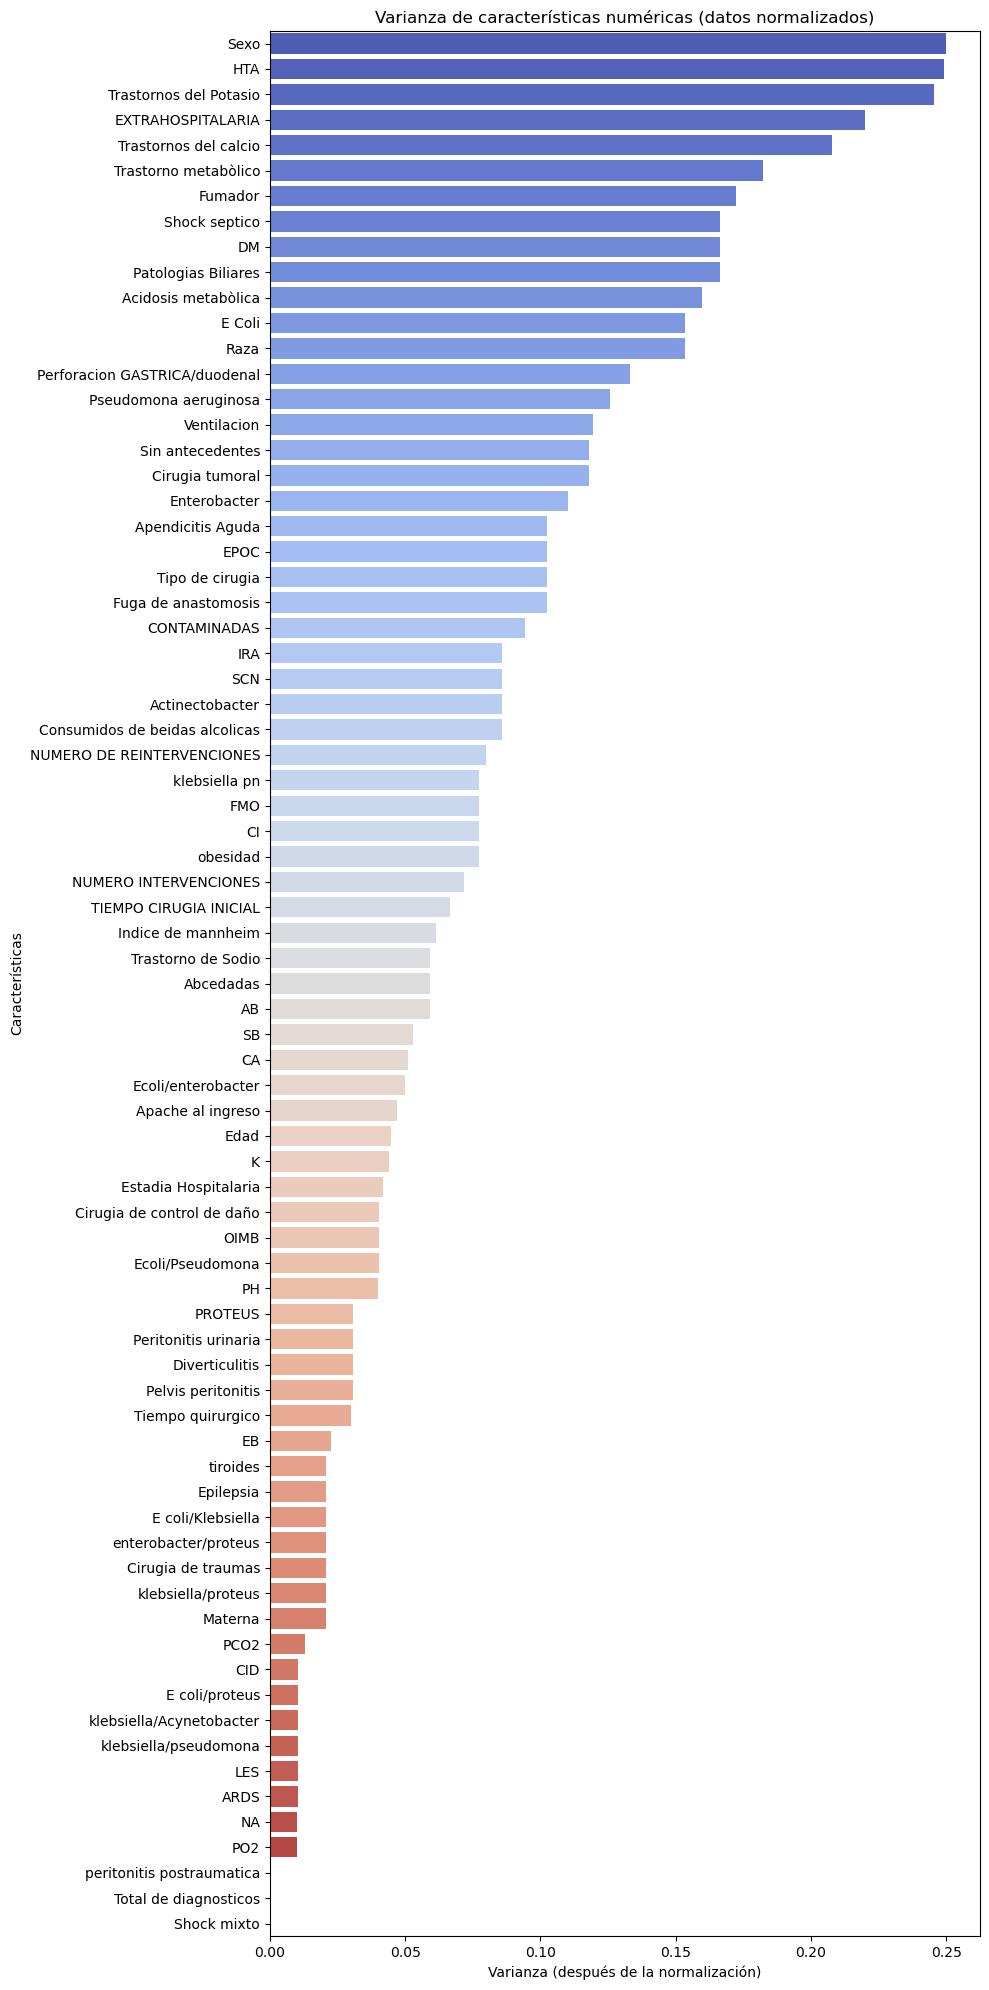

In [5]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

X_numeric = df.drop(columns=['Estado del egreso'])

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_numeric)

X_normalized_df = pd.DataFrame(X_normalized, columns=X_numeric.columns)

# Calcular varianza
selector_normalized = VarianceThreshold(threshold=0.0)
selector_normalized.fit(X_normalized_df)

# DataFrame de varianzas
varianza_normalized_df = pd.DataFrame({
    'Feature': X_normalized_df.columns,
    'Varianza': selector_normalized.variances_
}).sort_values(by='Varianza', ascending=False)

# Plot
plt.figure(figsize=(10, 20))
sns.barplot(data=varianza_normalized_df, x='Varianza', y='Feature', palette='coolwarm')
plt.title('Varianza de características numéricas (datos normalizados)')
plt.xlabel('Varianza (después de la normalización)')
plt.ylabel('Características')
plt.tight_layout()
plt.show()

In [6]:
columnas_a_eliminar_01 = varianza_normalized_df[varianza_normalized_df['Varianza'] < 0.1]['Feature'].tolist()

In [7]:
df_filtrado_01 = df.drop(columns=columnas_a_eliminar_01)
df_filtrado_01.columns

Index(['Estado del egreso', 'Sexo', 'Raza', 'Ventilacion', 'Sin antecedentes',
       'HTA', 'DM', 'EPOC', 'Fumador', 'Apendicitis Aguda',
       'Patologias Biliares', 'Perforacion GASTRICA/duodenal',
       'Fuga de anastomosis', 'Cirugia tumoral', 'Shock septico',
       'Trastorno metabòlico', 'Acidosis metabòlica', 'Trastornos del Potasio',
       'Trastornos del calcio', 'Pseudomona aeruginosa', 'E Coli',
       'Enterobacter', 'Tipo de cirugia', 'EXTRAHOSPITALARIA'],
      dtype='object')

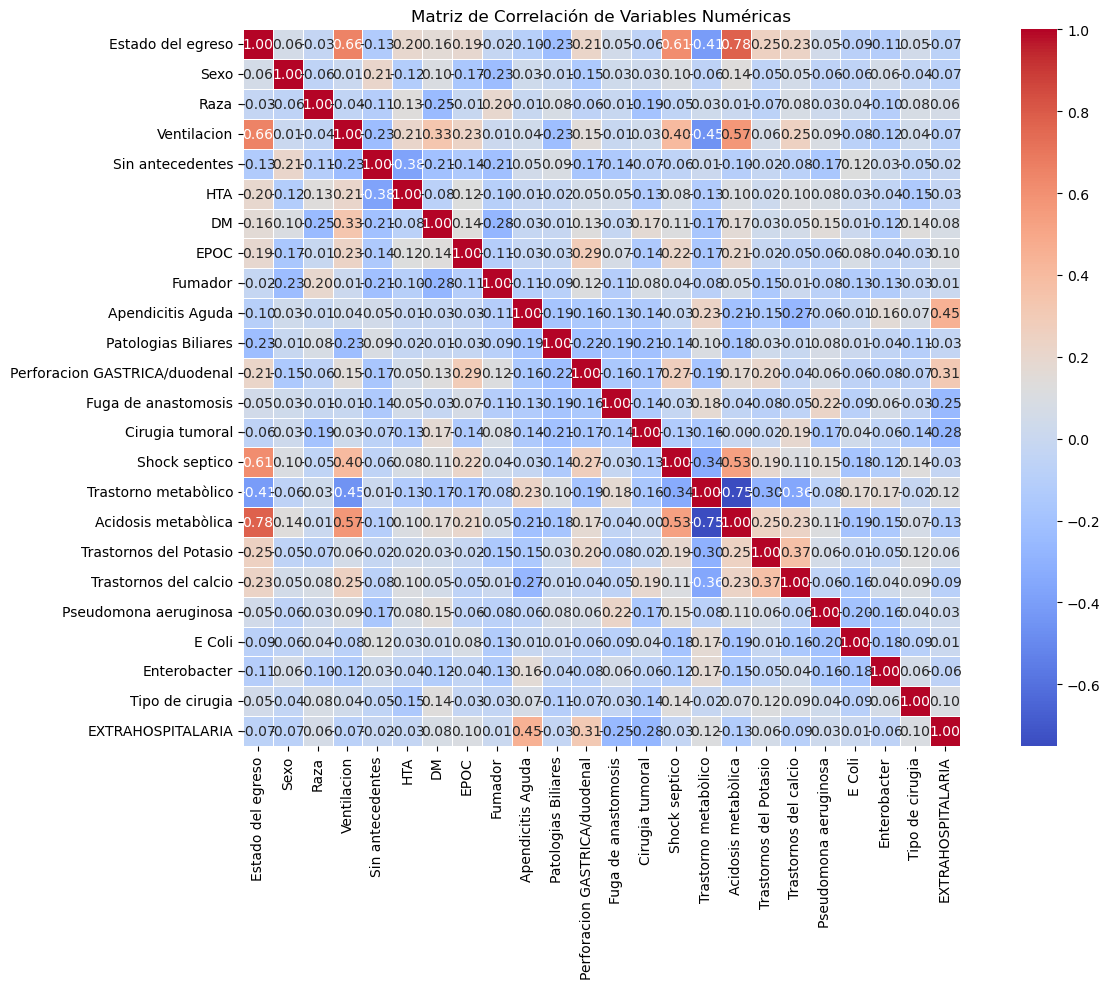

In [9]:
numeric_data = df_filtrado_01.select_dtypes(include=[np.number])


correlation_matrix = numeric_data.corr()


plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()

In [10]:
df_filtrado_01.to_csv('data/pre-model/data.csv',index=False)